<a href="https://colab.research.google.com/github/mohanrajmit/AGE_ESTIMATION/blob/master/imagenet_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import vgg19
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input


In [2]:
from tensorflow.keras.applications import MobileNetV2

In [3]:
mobile_net = MobileNetV2(weights="imagenet", include_top=True,input_shape=(224, 224, 3))

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Load Keras' VGG16 model that was pre-trained against the ImageNet database
model = vgg16.VGG16(weights='imagenet',include_top=True, input_shape=(224, 224, 3))

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [5]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model_inception = InceptionV3(weights='imagenet',include_top=True, input_shape=(299, 299, 3))

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# Load Keras' VGG16 model that was pre-trained against the ImageNet database
model_resnet = ResNet50(weights='imagenet', include_top=True,input_shape=(224,224,3))

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [41]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
img = image.load_img("/content/20.png", target_size=(224, 224))

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a fourth dimension (since Keras expects a list of images)
x = np.expand_dims(x, axis=0)

In [27]:
x.shape

(1, 224, 224, 3)

In [42]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
img_incep = image.load_img("/content/20.png", target_size=(299, 299))

# Convert the image to a numpy array
x_incep = image.img_to_array(img_incep)

# Add a fourth dimension (since Keras expects a list of images)
x_incep = np.expand_dims(x_incep, axis=0)

In [43]:
x_incep.shape

(1, 299, 299, 3)

In [44]:
# Normalize the input image's pixel values to the range used when training the neural network
x = vgg16.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
predictions = model.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = vgg16.decode_predictions(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


In [45]:
predicted_classes

[[('n03100240', 'convertible', 0.22887808),
  ('n03770679', 'minivan', 0.14049186),
  ('n02930766', 'cab', 0.09356919),
  ('n03930630', 'pickup', 0.09267622),
  ('n02814533', 'beach_wagon', 0.085976094)]]

In [46]:
# Normalize the input image's pixel values to the range used when training the neural network
x_incep = preprocess_input(x_incep)

# Run the image through the deep neural network to make a prediction
predictions_incep = model_inception.predict(x_incep)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes_incep = vgg16.decode_predictions(predictions_incep)
predicted_classes_incep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


[[('n02814533', 'beach_wagon', 0.9294662),
  ('n03930630', 'pickup', 0.009130289),
  ('n02930766', 'cab', 0.0059425924),
  ('n02974003', 'car_wheel', 0.005565326),
  ('n03100240', 'convertible', 0.005183609)]]

In [47]:
# Normalize the input image's pixel values to the range used when training the neural network
#x = vgg16.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
predictions = mobile_net.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes_mobile = vgg16.decode_predictions(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [48]:
predicted_classes_mobile

[[('n04243546', 'slot', 0.22362325),
  ('n04442312', 'toaster', 0.04225469),
  ('n02979186', 'cassette_player', 0.038404964),
  ('n02930766', 'cab', 0.030887505),
  ('n03100240', 'convertible', 0.02285752)]]

In [49]:
import matplotlib.pyplot as plt


In [51]:
org_img = image.load_img("/content/20.png", target_size=(299, 299))

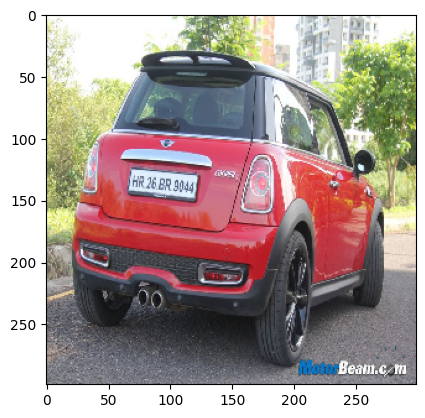

In [52]:
plt.imshow(org_img)

In [53]:
# Run the image through the deep neural network to make a prediction
predictions_resnet = model_resnet.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes_resnet = vgg16.decode_predictions(predictions_resnet)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


In [54]:
predicted_classes_resnet

[[('n02930766', 'cab', 0.13984448),
  ('n03100240', 'convertible', 0.1370097),
  ('n04285008', 'sports_car', 0.078678615),
  ('n04461696', 'tow_truck', 0.07723321),
  ('n03459775', 'grille', 0.07454376)]]